<a href="https://colab.research.google.com/github/isaacd68/MAT494-data-science/blob/main/3_5_3_6CalculusandOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-means Clustering**

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


generate our own data using the make_blobs function from the sklearn.datasets module. The centers parameter specifies the number of clusters.

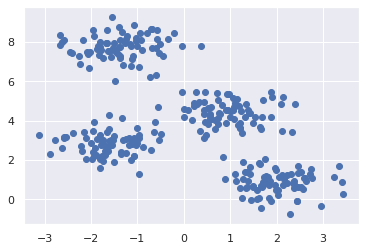

In [9]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

Even though we already know the optimal number of clusters, I figured we could still benefit from determining it using the elbow method. To get the values used in the graph, we train multiple models using a different number of clusters and storing the value of the intertia_ property (WCSS) every time.

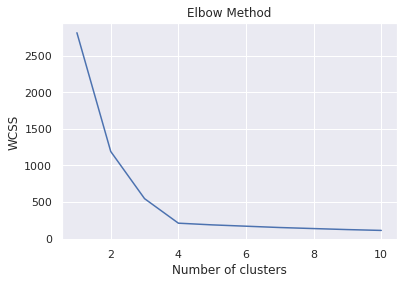

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Next, we’ll categorize the data using the optimum number of clusters (4) we determined in the last step. k-means++ ensures that you get don’t fall into the random initialization trap.

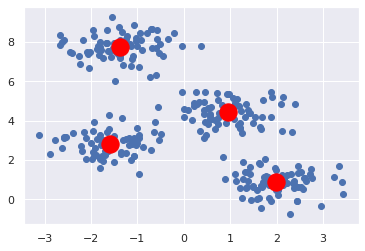

In [11]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# **Support Vector Machine**

In [14]:
>>> from sklearn.pipeline import make_pipeline
>>> from sklearn.preprocessing import StandardScaler
>>> from sklearn.svm import SVC

>>> clf = make_pipeline(StandardScaler(), SVC())

In [18]:
>>> from sklearn import svm
>>> X = [[0, 0], [1, 1]]
>>> y = [0, 1]
>>> clf = svm.SVC()
>>> clf.fit(X, y)
SVC()
from array import array

Using the Gram matrix

In [27]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
X, y = make_classification(n_samples=10, random_state=0)
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)
clf = svm.SVC(kernel='precomputed')
# linear kernel computation
gram_train = np.dot(X_train, X_train.T)
clf.fit(gram_train, y_train)

# predict on training examples
gram_test = np.dot(X_test, X_train.T)
clf.predict(gram_test)


array([0, 1, 0])